<img src="https://brand.umich.edu/assets/brand/style-guide/logo-guidelines/U-M_Logo-Horizontal-Hex.png" alt="Drawing" style="width: 300px;" align="left"/><br>
    
## Week 1: Exploratory data analysis for learning analytics (20pts)

Welcome aspiring data scientists!

In this course, you will be working with a wide variety of data about students and their learning processes. In each week, you will be tasked with different questions that requires extracting insights from the data, in order to inform future teaching and learning practices. Here's an overview of the next four weeks:


| Stage    	| Task                                             	| Purpose                                                                                                               	|
|:--------	|:--------------------------------------------------	|:------------------------------------------------------------------------------------------------------------------------	|
| Week 1 	| Exploratory data analysis for learning analytics 	| What are some historical trends in students learning behavior and academic performance?                                	|
| Week 2 	| Building prediction models of student success    	| Which students are likely to dropout or fail? Can we build an early at-risk detection model for in time interventions? 	|
| Week 3 	| Investigating the biases of prediction models    	| Are the prediction models biased toward certain population of students? Are the data biased?                           	|
| Week 4 	| Building a learning analytics dashboard          	| How can we communicate learning analytics insights to a non-technical audience (instructors, students, managers)?      	|



**In week 1**, you should familiarize yourself with the datasets, which will be used throughout this course. We will use a public dataset from the Open University Learning Analytics (OULAD). The Open University UK is the largest online distance higher education institution in Europe with over 120,000 enrolled students. This dataset has been used in previous "hackathons" at the Learning Analytics Knowledge (LAK) conference, a premier venue for learning analytics research where many Michigan faculty members and researchers have participated in. 

**Overview of the dataset**

The dataset contains the information about 22 courses, 32,593 students, their assessment results, and logs of their interactions with the Virtual Learning Environment (e.g., Moodle) represented by daily summaries of student clicks (10,655,280 entries). 

**Reference**

Kuzilek, J., Hlosta, M., & Zdrahal, Z. (2017). Open university learning analytics dataset. Scientific data, 4, 170171. https://www.nature.com/articles/sdata2017171

# Open University Learning Analytics (OULAD) dataset

Kuzilek, J., Hlosta, M., & Zdrahal, Z. (2017). Open university learning analytics dataset. Scientific data, 4, 170171. https://www.nature.com/articles/sdata2017171
## Data scheme
![](https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fsdata.2017.171/MediaObjects/41597_2017_Article_BFsdata2017171_Fig2_HTML.jpg)
## Course timeline
![](https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fsdata.2017.171/MediaObjects/41597_2017_Article_BFsdata2017171_Fig1_HTML.jpg)
## Relational database
* A module is a course
* A presentation is a semester (e.g., 2019J - Fall 2019, 2019B = Winter 2019)
* vle = virtual learning enviroment
![](https://analyse.kmi.open.ac.uk/resources/images/model.png)

---

## Part A (4 points)
Write a function that returns a pandas dataframe that consists of passing rate and dropout rate for each course.   
The output data frame should have 4 columns: code_module, code_presentation, passrate, dropoutrate  
Note:
* The dropout rate should be relative to the total number of enrolled students
* The passing rate should be relative to the number students who completed the course (i.e. not Withdrawn)

In [30]:
"""The output data frame should have 4 columns: code_module, code_presentation, pass_rate, dropout_rate"""

import pandas as pd
import numpy as np

def answer_a():
    stdinfo = pd.read_csv('assets/studentInfo.csv')
    
    ### BEGIN SOLUTION
    stdinfo_grp = stdinfo.groupby(['code_module','code_presentation'])
    result = stdinfo_grp.apply(lambda x: pd.Series(dict(
        pass_rate=(
            (x['final_result']=='Pass') | (x['final_result']=='Distinction')).sum()/        #number of passed 
            (x['final_result'] !='Withdrawn').sum(),             #number of completed
        dropout_rate = 
        (x['final_result'] =='Withdrawn').sum()/                  #number of withdrawn
        x['final_result'].count()                                 #number of enrolled
    )))
    result = result.reset_index()
    ### END SOLUTION
    
    return result
answer_a().head(5)

,code_module,code_presentation,pass_rate,dropout_rate
0,AAA,2013J,0.860681,0.156658
1,AAA,2014J,0.846154,0.180822
2,BBB,2013B,0.636292,0.285795
3,BBB,2013J,0.672944,0.287886
4,BBB,2014B,0.647373,0.303782


In [31]:
import pandas as pd
import numpy as np

# Check the number of courses
assert len(answer_a()) == 22

# Check the pass rate of AAA in 2013J
actual =  answer_a()[(answer_a()['code_module']=='AAA') &
                     (answer_a()['code_presentation']=='2013J')]['pass_rate'][0] 
desired = 0.860681
np.testing.assert_almost_equal(actual, desired, decimal=4, err_msg='', verbose=True)

### BEGIN HIDDEN TESTS
from pandas.testing import assert_frame_equal
def solution_a():
    stdinfo = pd.read_csv('assets/studentInfo.csv')
    stdinfo_grp = stdinfo.groupby(['code_module','code_presentation'])
    result = stdinfo_grp.apply(lambda x: pd.Series(dict(
        pass_rate=(
            (x['final_result']=='Pass') | (x['final_result']=='Distinction')).sum()/        #number of passed 
            (x['final_result'] !='Withdrawn').sum(),             #number of completed
        dropout_rate = 
        (x['final_result'] =='Withdrawn').sum()/                  #number of withdrawn
        x['final_result'].count()                                 #number of enrolled
    )))
    result = result.reset_index()
    return result
assert_frame_equal(answer_a(), solution_a(), check_dtype=False, check_names=False,check_like=True)

### END HIDDEN TESTS

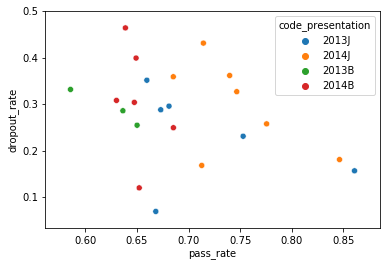

In [12]:
# let's visualize the courses by passrate and dropout rate
# Create a scatter plot
import seaborn as sns
sns.scatterplot(x="pass_rate", y="dropout_rate", data=answer_a(), hue="code_presentation")

---

## Part B (8 points)

As course instructor, we would be interested in tracking the level of student engagement on a weekly basis.  
Write a function that returns a pandas dataframe that consists of a weekly engagement metric, defined as the **average number of click per student per week** for each course.     
The output data frame should have 4 columns: **code_module, code_presentation, week, mean_click**.   
Use the following bin range to **convert date to week**. Hint: There are many ways to bin data, one of them is to use np.digitize and np.linspace. 


| date_bin 	| week 	|
|----------	|------	|
| ...      	| ...  	|
| [-14,-8] 	| -2   	|
| [-7,-1]  	| -1   	|
| [0,6]    	| 1    	|
| [7,13]   	| 2    	|
| [14,20]  	| 3    	|
| ...      	| ...  	|

In [2]:
"""The output data frame should have 4 columns: code_module, code_presentation, week, mean_click"""
import pandas as pd
import numpy as np

def answer_b():
    result = None
    ### BEGIN SOLUTION  
    stdvle = pd.read_csv('assets/studentVle.csv')
    bin_range = np.linspace(-28, 273, 44) # create 44 equal bins from -28 to 273 
    date_array = stdvle.date
    date_array = np.array(date_array)
    bin_date = np.digitize(date_array,bin_range)

    stdvle['week']=bin_date-4
    stdvle.loc[stdvle['date'] < 0, 'week'] = stdvle['week'] - 1
    stdvle[(stdvle['date']>-9) & (stdvle['date']<9)][['date','week']].value_counts(sort=False)
    stdvle_grp = stdvle.groupby(['code_module','code_presentation','id_student','week']).agg(sum_click=pd.NamedAgg(column="sum_click", aggfunc="sum")).reset_index()
    stdvle_grp = stdvle_grp.groupby(['code_module','code_presentation','week']).agg(
        mean_click= pd.NamedAgg(column="sum_click", aggfunc="mean"))
    result = stdvle_grp.reset_index()
    ### END SOLUTION
    return result
answer_b()

,code_module,code_presentation,week,mean_click
0,AAA,2013J,-2,70.099668
1,AAA,2013J,-1,91.127796
2,AAA,2013J,1,100.771513
3,AAA,2013J,2,111.630499
4,AAA,2013J,3,123.728291
...,...,...,...,...
874,GGG,2014J,35,4.712500
875,GGG,2014J,36,4.657143
876,GGG,2014J,37,3.840580
877,GGG,2014J,38,3.838235


In [174]:
# Autograder tests

result_b = answer_b()

# Check the length of output
assert len(result_b) == 879

# Check the mean_click of AAA in 2013J week 1
actual =  result_b[(result_b['code_module']=='AAA') &
                     (result_b['code_presentation']=='2013J') &
                     (result_b['week']==1)]['mean_click'].values
desired = 100.771513
np.testing.assert_almost_equal(actual, desired, decimal=2)

# Check the week
if 0 in result_b['week'].unique():
    raise AssertionError("There should be no week 0 in the dataset, check the instruction") 

### BEGIN HIDDEN TESTS

from pandas.testing import assert_frame_equal
def solution_b():
    import pandas as pd
    import numpy as np
      
    stdvle = pd.read_csv('assets/studentVle.csv')
    bin_range = np.linspace(-28, 273, 44) # create 44 equal bins from -28 to 273 
    date_array = stdvle.date
    date_array = np.array(date_array)
    bin_date = np.digitize(date_array,bin_range)

    stdvle['week']=bin_date-4
    stdvle.loc[stdvle['date'] < 0, 'week'] = stdvle['week'] - 1
    stdvle[(stdvle['date']>-9) & (stdvle['date']<9)][['date','week']].value_counts(sort=False)
    stdvle_grp = stdvle.groupby(['code_module','code_presentation','id_student','week']).agg(sum_click=pd.NamedAgg(column="sum_click", aggfunc="sum")).reset_index()
    stdvle_grp = stdvle_grp.groupby(['code_module','code_presentation','week']).agg(
        mean_click= pd.NamedAgg(column="sum_click", aggfunc="mean"))
    result = stdvle_grp.reset_index()
    
    return result

solution_b = solution_b()
assert_frame_equal(result_b, solution_b, check_dtype=False, check_names=False,check_like=True)

### END HIDDEN TESTS

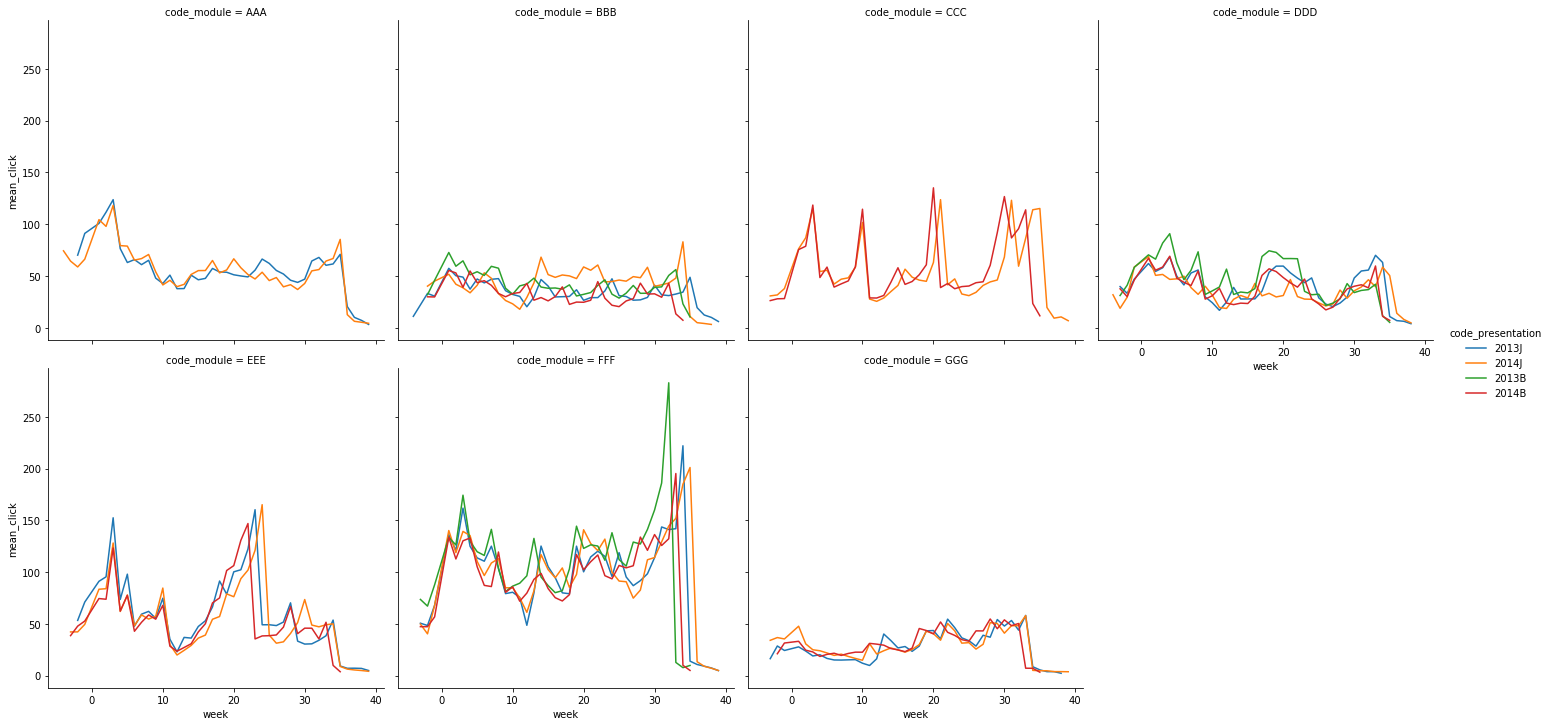

In [164]:
# Let's plot the result
import seaborn as sns
sns.relplot(data=answer_b(), x="week", y="mean_click", col="code_module",hue="code_presentation",
            kind="line", col_wrap=4)

---

## Part C (8 points)

As course instructors, we would be interested in tracking the submission rate and the pass rate of each assignment.  
Write a function that returns a pandas dataframe that consists of 6 columns: **code_module, code_presentation, id_assessment, assessment_type, submission_rate, pass_rate**.

**Submission_rate** is defined as the **number of students who submitted the assignment** divided by the **current number of enrollment**. The **current number of enrollment** changes over time as students **withdraw/unregister**.

For example, course A in week 1 has 100 enrolled students, 90 submitted their week 1 assignment, submission rate week 1 = 90%
In week 2, 5 students dropped out, so the enrollment number is now 95. Out of 95 students, 85 submitted week 2 assignment, submission rate week 2 = 85/95 = 89.5%

**Passing_rate** is defined as the **number of students who submitted the assignment AND achieve score >50** divided by the **number of students who submitted the assignment**.

Note: 
* Replace the missing values in the 'date' column in assessments.csv with 250
* Delete row where id_assessment == 40088 & 40087

In [168]:
"""The output data frame should have 6 columns: code_module, code_presentation, id_assessment, assessment_type, submission_rate, pass_rate"""
import pandas as pd
import numpy as np

def answer_c():
    # Import assessments.csv
    assessments = pd.read_csv('assets/assessments.csv')
    # Data cleaning
    assessments["date"] = assessments["date"].fillna(250)
    assessments = assessments[(assessments['id_assessment']!=40088) &
                              (assessments['id_assessment']!=40087)]
    # Import student registration data
    stdreg = pd.read_csv('assets/studentRegistration.csv')
    # Import student grades
    stdgrade = pd.read_csv('assets/studentAssessment.csv')
    
    ### BEGIN SOLUTION  
    
    # Merge assessments with registration data
    stdreg_assess = pd.merge(assessments,stdreg,on=['code_module','code_presentation'],how='inner')
    # Create a dummy variable for each student's enrollment status before each assignment deadline
    stdreg_assess['enrolled'] = 1
    stdreg_assess.loc[stdreg_assess['date_unregistration'] <= stdreg_assess['date'], 'enrolled'] = 0
    # Sum enrollment number by each assessment
    stdreg_assess = stdreg_assess.groupby(['code_module','code_presentation','id_assessment']).agg(
                    enrolled_sum=pd.NamedAgg(column="enrolled", aggfunc="sum")).reset_index()
    # Create a dummy for all
    stdgrade['submitted'] = 1
    # Create a dummy for those who passed, had score >= 50
    stdgrade['pass'] = 1
    stdgrade.loc[stdgrade['score'] <= 50, 'pass'] = 0
    # Calculate number of students that submitted and that passed by each assignment
    stdgrade = stdgrade.groupby(['id_assessment']).agg(
                    submitted_sum=pd.NamedAgg(column="submitted", aggfunc="sum"),
                    pass_sum=pd.NamedAgg(column="pass", aggfunc="sum")).reset_index()

    # Merge assessment, and student grades
    stdgrade_assess = pd.merge(stdgrade,assessments,how='outer',on='id_assessment')

    # Merge assessment, student grades, and student registration
    stdgrade_assess_reg = pd.merge(stdreg_assess,stdgrade_assess,how='inner',on=['code_module','code_presentation','id_assessment'])
    # Compute submission rate
    stdgrade_assess_reg['submission_rate'] = stdgrade_assess_reg['submitted_sum']/stdgrade_assess_reg['enrolled_sum']
    # Compute pass rate
    stdgrade_assess_reg['pass_rate'] = stdgrade_assess_reg['pass_sum']/stdgrade_assess_reg['submitted_sum']
    # Return df
    result = stdgrade_assess_reg[['code_module','code_presentation','id_assessment','submission_rate','pass_rate']]

    ### END SOLUTION
    return result
answer_c()

,code_module,code_presentation,id_assessment,submission_rate,pass_rate
0,AAA,2013J,1752,0.965054,0.952646
1,AAA,2013J,1753,0.936986,0.903509
2,AAA,2013J,1754,0.937677,0.930514
3,AAA,2013J,1755,0.885965,0.920792
4,AAA,2013J,1756,0.908537,0.899329
...,...,...,...,...,...
199,GGG,2014J,37440,0.766400,0.937370
200,GGG,2014J,37441,0.756800,0.980973
201,GGG,2014J,37442,0.665600,0.860577
202,GGG,2014J,37443,0.550400,0.924419


In [169]:
import pandas as pd
import numpy as np

result_c = answer_c()

# Check the length of output
assert len(result_c) == 204

# Check the submission rate of AAA in 2013J id_assessment==1756
actual =  result_c[(result_c['code_module']=='AAA') &
                     (result_c['code_presentation']=='2013J') &
                     (result_c['id_assessment']==1756)]['submission_rate'].values
desired = 0.908537
np.testing.assert_almost_equal(actual, desired, decimal=2)

### BEGIN HIDDEN TESTS

from pandas.testing import assert_frame_equal
def solution_c():
    # Import assessments.csv
    assessments = pd.read_csv('assets/assessments.csv')
    # Data cleaning
    assessments["date"] = assessments["date"].fillna(250)
    assessments = assessments[(assessments['id_assessment']!=40088) &
                              (assessments['id_assessment']!=40087)]
    # Import student registration data
    stdreg = pd.read_csv('assets/studentRegistration.csv')
    # Import student grades
    stdgrade = pd.read_csv('assets/studentAssessment.csv')
        
    # Merge assessments with registration data
    stdreg_assess = pd.merge(assessments,stdreg,on=['code_module','code_presentation'],how='inner')
    # Create a dummy variable for each student's enrollment status before each assignment deadline
    stdreg_assess['enrolled'] = 1
    stdreg_assess.loc[stdreg_assess['date_unregistration'] <= stdreg_assess['date'], 'enrolled'] = 0
    # Sum enrollment number by each assessment
    stdreg_assess = stdreg_assess.groupby(['code_module','code_presentation','id_assessment']).agg(
                    enrolled_sum=pd.NamedAgg(column="enrolled", aggfunc="sum")).reset_index()
    # Create a dummy for all
    stdgrade['submitted'] = 1
    # Create a dummy for those who passed, had score >= 50
    stdgrade['pass'] = 1
    stdgrade.loc[stdgrade['score'] <= 50, 'pass'] = 0
    # Calculate number of students that submitted and that passed by each assignment
    stdgrade = stdgrade.groupby(['id_assessment']).agg(
                    submitted_sum=pd.NamedAgg(column="submitted", aggfunc="sum"),
                    pass_sum=pd.NamedAgg(column="pass", aggfunc="sum")).reset_index()

    # Merge assessment, and student grades
    stdgrade_assess = pd.merge(stdgrade,assessments,how='outer',on='id_assessment')

    # Merge assessment, student grades, and student registration
    stdgrade_assess_reg = pd.merge(stdreg_assess,stdgrade_assess,how='inner',on=['code_module','code_presentation','id_assessment'])
    # Compute submission rate
    stdgrade_assess_reg['submission_rate'] = stdgrade_assess_reg['submitted_sum']/stdgrade_assess_reg['enrolled_sum']
    # Compute pass rate
    stdgrade_assess_reg['pass_rate'] = stdgrade_assess_reg['pass_sum']/stdgrade_assess_reg['submitted_sum']
    # Return df
    result = stdgrade_assess_reg[['code_module','code_presentation','id_assessment','submission_rate','pass_rate']]
    return result

assert_frame_equal(result_c, solution_c(), check_dtype=False, check_names=False,check_like=True)

### END HIDDEN TESTS